# Анализ трансляций медицинского учреждения N

* ***Цели:*** 
    + *дать рекомендации заказчику по наполняемости будущих мероприятий посредством определения популярных и непопулярных тем;*
    + *сформировать списки групп пользователей по интересам с целью рассылки приглашений на мероприятия.*

***Задача:*** *определить наиболее интересные темы и популярных спикеров, сегментировать пользователей по интересам.*

* ***Данные представлены следующими сетами:*** 
    + **Все мероприятия** - *просмотры мероприятий пользователями. Включает id пользователя, город, специальность, когда начал и когда закончил просмотр.*
    + **Расписание выступлений 11** - *расписание выступлений спикеров Мероприятия 11. Включает тему доклада, место и дату выступляния.*
    + **Расписание выступлений 12** - *расписание выступлений спикеров Мероприятия 12. Включает тему доклада, место и дату выступляния.*
    + **Расписание_небольшие_мероприятия** - *расписаниелений спикеров небольших тематических мероприятий центра. Включает тему доклада, место и дату выступляния.*
    + **Словарь рубрик 11 - 12** - *классификатор рубрик. Включает информацию о рубриках каждого потока Мероприятий 11, 12.*

# Декомпозиция

* *Импорт библиотек, первичный обзор данных, предобработка*
    + Импорт всех необходимых для анализа библиотек.
    + Загрузка данных.
    + Первичный обзор данных.
    + Приведение наименований колонок к единому стилю.
    + Анализ соотвествия типов представленным данным.
    + Выявление и анализ пропусков в данных.
    + Проверка данных на явные и неявные дубликаты.
***********************    
* *Исследовательский анализ данных*
    + Выявление поппулярных спикеров и тем Мероприятий 11, 12 и небольших тематических трансляций онкоцентра.
***********************
* *Сегментирование*
    + "Портрет" наиболее активных слушателей.
    + Формирование списков (уникальные идентификаторы слушателей) для рассылок приглашений по наиболее поппулярным темам.
***********************
-----------------------
* *Выводы*

## Импорт библиотек, первичный обзор данных, предобработка

In [1020]:
#импорт библиотек
import pandas as pd
import datetime as dt
import warnings
from datetime import datetime, timedelta, date, time
import numpy as np
import plotly.express as px
from plotly import graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

In [1021]:
#загрузка данных
warnings.filterwarnings('ignore')
views_all = pd.read_csv('C:\\Users\\Дарья\\Desktop\\project_pet\\датасет NDA\\данные\\Все мероприятия.csv', index_col= False, sep=';')
schedule_2011 = pd.read_excel('C:\\Users\\Дарья\\Desktop\\project_pet\\датасет NDA\\данные\\Расписание выступлений 11.xlsx')
schedule_2012 = pd.read_excel('C:\\Users\\Дарья\\Desktop\\project_pet\\датасет NDA\\данные\\Расписание выступлений 12.xlsx')
small_perform = pd.read_excel('C:\\Users\\Дарья\\Desktop\\project_pet\\датасет NDA\\данные\\Расписание_небольших_мероприятий.xlsx')
dict_of_rubrics = pd.read_excel('C:\\Users\\Дарья\\Desktop\\project_pet\\датасет NDA\\данные\\Словарь рубрик 11-12.xlsx', skiprows=2)

### Просмотры

In [1022]:
pd.set_option('display.max_colwidth', None)

In [1023]:
#смотрим данные и информацию о них
def data_info(df):
    return display(df.head(10).T), df.info(), display(df.describe(include='all'))
data_info(views_all)

,0,1,2,3,4,5,6,7,8,9
UID,16573.0,16573.0,16573.0,16573.0,16573.0,16573.0,16573.0,NaN,1396.0,16583.0
OID,626199.0,626199.0,626199.0,626199.0,626199.0,626199.0,626199.0,NaN,619071.0,626268.0
BARCODE,0809202204421616573,0809202204421616573,0809202204421616573,0809202204421616573,0809202204421616573,0809202204421616573,0809202204421616573,NaN,250820222020141396,0909202221250816583
COUNTRY,Россия,Россия,Россия,Россия,Россия,Россия,Россия,NaN,Россия,Молдова
REGION,Амурская обл.,Амурская обл.,Амурская обл.,Амурская обл.,Амурская обл.,Амурская обл.,Амурская обл.,NaN,Удмуртия,Молдова
CITY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ижевск,Кишинев
PROFESSION,Врач,Врач,Врач,Врач,Врач,Врач,Врач,NaN,Врач,Врач
SPECIALIZATION,онкология: хирургия (огш),онкология: хирургия (огш),онкология: хирургия (огш),онкология: хирургия (огш),онкология: хирургия (огш),онкология: хирургия (огш),онкология: хирургия (огш),NaN,Другое,патологическая анатомия
"Общее время просомтра, мин",52.0,52.0,52.0,52.0,52.0,52.0,52.0,NaN,60.0,11.0
ПОТОК,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154333 entries, 0 to 154332
Data columns (total 27 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   UID                         134779 non-null  float64
 1   OID                         135694 non-null  float64
 2   BARCODE                     135694 non-null  object 
 3   COUNTRY                     127206 non-null  object 
 4   REGION                      118648 non-null  object 
 5   CITY                        133047 non-null  object 
 6   PROFESSION                  133191 non-null  object 
 7   SPECIALIZATION              131793 non-null  object 
 8   Общее время просомтра, мин  135694 non-null  float64
 9   ПОТОК                       135694 non-null  float64
 10  Устройство                  135694 non-null  object 
 11  Оп.сис                      135693 non-null  object 
 12  Броузер                     135693 non-null  object 
 13  Время начала  

,UID,OID,BARCODE,COUNTRY,REGION,CITY,PROFESSION,SPECIALIZATION,"Общее время просомтра, мин",ПОТОК,...,"Время просомтра, мин",Кол-во кликов,ID открытой сессии,ID закрытой сессии,IP,Unnamed: 22,SERVER SESSION ID,Статус открытия,Статус закрытия,Мероприятие
count,134779.000000,135694.000000,135694,127206,118648,133047,133191,131793,135694.000000,135694.000000,...,135694,7362.00000,6704,125771,0.0,0.0,135694,72018,84890,154333
unique,NaN,NaN,4811,19,130,257,87,109,NaN,NaN,...,1025,NaN,4707,42696,NaN,NaN,37014,4,17,8
top,NaN,NaN,1406202307221915249,Россия,Санкт-Петербург и область,Санкт-Петербург,Врач,Другое,NaN,NaN,...,0 сек.,NaN,FtmeOzVLXlmECl,wQ0CxJzqPuXjXe,NaN,NaN,MGYBUfj1l6XGvqHkBAa1jqmRMvDAKjYX,PLAY_RESTART_STOP,DESTROY_PAUSE,Мероприятие 11
freq,NaN,NaN,775,120591,46251,52189,76348,20085,NaN,NaN,...,10472,NaN,11,756,NaN,NaN,755,29397,31211,77853
mean,9520.471327,713411.674695,NaN,NaN,NaN,NaN,NaN,NaN,137.275097,3.149100,...,NaN,1.67210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,6576.852007,194064.854739,NaN,NaN,NaN,NaN,NaN,NaN,171.408109,2.275562,...,NaN,1.53996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,160.000000,506402.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,...,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,3323.000000,530290.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,...,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,9523.000000,550477.000000,NaN,NaN,NaN,NaN,NaN,NaN,40.000000,3.000000,...,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,15049.000000,921002.000000,NaN,NaN,NaN,NaN,NaN,NaN,272.000000,4.000000,...,NaN,2.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(None, None, None)

По первичному знакомству с данными можно сделать следующие наблюдения: пропуски практически во всех столбцах, даты не имеют тип datetime, наименования столбцов не в едином стиле, топ-город среди просмотров - Санкт-Петербург, топ-мероптриятие - Мероприятие 11. Приступаем к предобработке.

Приведем к единообразному виду наименование столбцов.

In [1024]:
views_all = views_all.rename(columns={'UID': 'uid', 'OID': 'oid', 'BARCODE': 'barcode', 'COUNTRY': 'country', 'REGION': 'region',\
                                      'CITY': 'city_view', 'PROFESSION': 'profession', 'SPECIALIZATION': 'specialization',\
                                      'Общее время просомтра, мин': 'total_time_views_min', 'ПОТОК': 'flow', 'Устройство': 'device',\
                                      'Оп.сис': 'op_system', 'Броузер': 'browser', 'Время начала': 'time_start_view', 'Время окончания':\
                                      'time_end_view', 'Timestamp начала': 'timestamp_start', 'Timestamp окончания': 'timestamp_end',
                                      'Время просомтра, мин': 'time_views_min','Кол-во кликов': 'clicks', 'ID открытой сессии':\
                                      'id_open_ses', 'ID закрытой сессии': 'id_closed_ses', 'IP': 'ip', 'SERVER SESSION ID':\
                                      'server_session_id', 'Статус открытия': 'opening_status', 'Статус закрытия': 'closing_status',\
                                      'Мероприятие': 'event'})

views_all.columns

Index(['uid', 'oid', 'barcode', 'country', 'region', 'city_view', 'profession',
       'specialization', 'total_time_views_min', 'flow', 'device', 'op_system',
       'browser', 'time_start_view', 'time_end_view', 'timestamp_start',
       'timestamp_end', 'time_views_min', 'clicks', 'id_open_ses',
       'id_closed_ses', 'ip', 'Unnamed: 22', 'server_session_id',
       'opening_status', 'closing_status', 'event'],
      dtype='object')

In [1025]:
#посчитаем пропущенные значения
pd.DataFrame(round((views_all.isna().mean()*100),1))#.style.background_gradient()

,0
uid,12.7
oid,12.1
barcode,12.1
country,17.6
region,23.1
city_view,13.8
profession,13.7
specialization,14.6
total_time_views_min,12.1
flow,12.1


In [1026]:
#смотрим данные с пропусками в uid
views_all[views_all['uid'].isna()]

,uid,oid,barcode,country,region,city_view,profession,specialization,total_time_views_min,flow,...,time_views_min,clicks,id_open_ses,id_closed_ses,ip,Unnamed: 22,server_session_id,opening_status,closing_status,event
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Мероприятие 1
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Мероприятие 1
18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Мероприятие 1
22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Мероприятие 1
28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Мероприятие 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Мероприятие 12
154313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Мероприятие 12
154316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Мероприятие 12
154322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Мероприятие 12


Данные с пропусками в uid имеют пропуски и в других столбцах. Можем удалить эти строки.

In [1027]:
#удаляем
views_all = views_all.dropna(subset=['uid'])
#смотрим что осталось
pd.DataFrame(round((views_all.isna().mean()*100),2))#.style.background_gradient()

,0
uid,0.00
oid,0.00
barcode,0.00
country,5.62
region,11.97
city_view,1.29
profession,1.18
specialization,2.22
total_time_views_min,0.00
flow,0.00


In [1028]:
#полные дубликаты
views_all.duplicated().sum()

1499

In [1029]:
#удаляем
views_all = views_all.drop_duplicates().reset_index(drop=True)
#проверяем
views_all.duplicated().sum()

0

In [1030]:
#неявные дубликаты в city_view
views_all['city_view'].unique()

array([nan, 'Ижевск', 'Кишинев', 'Махачкала', 'Павлодар',
       'Санкт-Петербург', 'Тирасполь', 'Гусь Хрустальный', 'Белгород',
       'Ростов-на-Дону', 'Москва', 'Сыктывкар', 'Зеленогорск', 'Вологда',
       'Новосибирск', 'Гродно', 'Кемерово', 'Уфа', 'Минск', 'Нальчик',
       'Омск', 'Симферополь', 'Рязань', 'Череповец', 'еее', 'Калининград',
       'Балларат', 'Нижний Новгород', 'Брест', 'Элиста', 'Казань',
       'Астрахань', 'Энгельс', 'Воронеж', 'Ярославль', 'Чебоксары',
       'Краснодар', 'Владикавказ', 'Архангельск', 'Хоринск', 'Улан-Удэ',
       'Сочи', 'Пенза', 'Якутск', 'Самара', 'Тюмень', 'Волгоград',
       'Брянск', 'Челябинск', 'undefined', 'Луганск', 'вар', 'Пермь',
       'Томск', 'Сургут', 'Армавир', 'Ванино', 'Муром', 'Великие Луки',
       'Раменское', 'Тетюши', 'Чимкент', 'Палласовка', 'Ереван',
       'Красноярск', 'Донецк', 'Бишкек', 'Ульяновск', 'Орск',
       'Екатеринбург', 'Владимир', 'Городище', 'Владивосток', 'Азов',
       'Иваново', 'Оренбург', 'Бийск'

Заменим 'Санкт-Петербург ' и 'Санкт – Петербург' на 'Санкт–Петербург'

In [1032]:
views_all['city_view'] = views_all['city_view']. replace({'Санкт-Петербург ': 'Санкт-Петербург', \
                                                          'Санкт – Петербург': 'Санкт-Петербург'})

In [1033]:
#проверяем
views_all['city_view'].unique()

array([nan, 'Ижевск', 'Кишинев', 'Махачкала', 'Павлодар',
       'Санкт-Петербург', 'Тирасполь', 'Гусь Хрустальный', 'Белгород',
       'Ростов-на-Дону', 'Москва', 'Сыктывкар', 'Зеленогорск', 'Вологда',
       'Новосибирск', 'Гродно', 'Кемерово', 'Уфа', 'Минск', 'Нальчик',
       'Омск', 'Симферополь', 'Рязань', 'Череповец', 'еее', 'Калининград',
       'Балларат', 'Нижний Новгород', 'Брест', 'Элиста', 'Казань',
       'Астрахань', 'Энгельс', 'Воронеж', 'Ярославль', 'Чебоксары',
       'Краснодар', 'Владикавказ', 'Архангельск', 'Хоринск', 'Улан-Удэ',
       'Сочи', 'Пенза', 'Якутск', 'Самара', 'Тюмень', 'Волгоград',
       'Брянск', 'Челябинск', 'undefined', 'Луганск', 'вар', 'Пермь',
       'Томск', 'Сургут', 'Армавир', 'Ванино', 'Муром', 'Великие Луки',
       'Раменское', 'Тетюши', 'Чимкент', 'Палласовка', 'Ереван',
       'Красноярск', 'Донецк', 'Бишкек', 'Ульяновск', 'Орск',
       'Екатеринбург', 'Владимир', 'Городище', 'Владивосток', 'Азов',
       'Иваново', 'Оренбург', 'Бийск'

In [1034]:
#неявные дубликаты в country
views_all['country'].unique()

array(['Россия', 'Молдова', 'Казахстан', 'Беларусь', nan, 'Австралия',
       'undefined', 'Украина', 'Армения', 'Кыргызстан', 'Узбекистан',
       'Латвия', 'Германия', 'Россия ', 'Таджикистан', 'Китай',
       'Азербайджан', '1', 'Выберите', 'Россич'], dtype=object)

Заменим 'Россия ' и 'Россич' на 'Россия'.

In [1036]:
views_all['country'] = views_all['country']. replace ({'Россия ': 'Россия', 'Россич': 'Россия'})

In [1037]:
#проверка
views_all['country'].unique()

array(['Россия', 'Молдова', 'Казахстан', 'Беларусь', nan, 'Австралия',
       'undefined', 'Украина', 'Армения', 'Кыргызстан', 'Узбекистан',
       'Латвия', 'Германия', 'Таджикистан', 'Китай', 'Азербайджан', '1',
       'Выберите'], dtype=object)

In [1038]:
#неявные дубликаты в profession
views_all['profession'].unique()

array(['Врач', 'Представитель медицинской компании',
       'Ординатор - Аспирант', 'Руководящее звено клиники',
       'Студент медицинского ВУЗа', 'Фармацевт', 'Другое',
       'Средний медперсонал', 'врач',
       'Представитель общественной организации',
       'обучающийся по медицинской специальности',
       'руководящее звено клиники', 'другое', 'Медперсонал',
       'Исследователь', 'исследователь', 'немедициснкий персонал клиники',
       'представитель медицинской компании', 'средний медпероснал',
       'онколог', 'Онколог', nan, '  ', 'врач-онколог', 'организатор',
       'врач ХТ',
       'Специалист отдела организации доклинических и клинических исследований НМИЦ онкологии им. Н. Н. Петрова',
       'зав отд. ХТ', 'Онколог-гинеколог ',
       'Немедицинский персонал клиники', 'онкогинеколог',
       'врач, химиотерапевт', 'клинический фармаколог',
       'зав. ХТ, химиотерапевт', 'врач-гематолог',
       'онколог, клин.фармаколог', 'врач - онколог, химиотерапевт',
      

Сделаем минимальные замены, чтобы портрет активного пользователя выглядел менее вариативно.

In [1039]:
views_all['profession'] = views_all['profession']. replace ({'врач': 'Врач', 'другое': 'Другое', \
                                                             'Средний медперсонал': 'Медперсонал',\
                                                             'средний медпероснал': 'Медперсонал', \
                                                             'исследователь': 'Исследователь', \
                                                             'онколог': 'Онколог','немедициснкий персонал клиники': 'Немедицинский персонал клиники', \
                                                             'руководящее звено клиники': 'Руководящее звено клиники', \
                                                             'врач-онколог': 'Онколог', 'представитель медицинской компании': 'Представитель медицинской компании'})

In [1040]:
#меняем типы данных
views_all['uid'] = views_all['uid'].astype('int')
views_all['oid'] = views_all['oid'].astype('int')
views_all['time_start_view'] = pd.to_datetime(views_all['timestamp_start'], unit='s') + timedelta(hours=3)
views_all['time_end_view'] = pd.to_datetime(views_all['timestamp_end'], unit='s') + timedelta(hours=3)
views_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133280 entries, 0 to 133279
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   uid                   133280 non-null  int32         
 1   oid                   133280 non-null  int32         
 2   barcode               133280 non-null  object        
 3   country               125708 non-null  object        
 4   region                117155 non-null  object        
 5   city_view             131549 non-null  object        
 6   profession            131692 non-null  object        
 7   specialization        130295 non-null  object        
 8   total_time_views_min  133280 non-null  float64       
 9   flow                  133280 non-null  float64       
 10  device                133280 non-null  object        
 11  op_system             133279 non-null  object        
 12  browser               133279 non-null  object        
 13 

In [1041]:
#выделим дату в отдельный столбец
views_all['date'] = views_all['time_start_view'].dt.date
views_all['date'] = pd.to_datetime(views_all['date'])
views_all['date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 133280 entries, 0 to 133279
Series name: date
Non-Null Count   Dtype         
--------------   -----         
133280 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.0 MB


In [1042]:
#считаем время просмотра в минутах
views_all['views_duration'] = (views_all['time_end_view'] - views_all['time_start_view'])/np.timedelta64 ( 1 , 'm')
views_all.head().T

,0,1,2,3,4
uid,16573,16573,16573,16573,16573
oid,626199,626199,626199,626199,626199
barcode,0809202204421616573,0809202204421616573,0809202204421616573,0809202204421616573,0809202204421616573
country,Россия,Россия,Россия,Россия,Россия
region,Амурская обл.,Амурская обл.,Амурская обл.,Амурская обл.,Амурская обл.
city_view,NaN,NaN,NaN,NaN,NaN
profession,Врач,Врач,Врач,Врач,Врач
specialization,онкология: хирургия (огш),онкология: хирургия (огш),онкология: хирургия (огш),онкология: хирургия (огш),онкология: хирургия (огш)
total_time_views_min,52.0,52.0,52.0,52.0,52.0
flow,1.0,1.0,1.0,1.0,1.0


In [1043]:
#уникальные потоки
views_all['flow'].unique()

array([ 1.,  3.,  4.,  2.,  7.,  5.,  6.,  8., 10.,  9., 11.])

Список потоков выглядит адекватно.

### РАСПИСАНИЕ

### Расписание малых мероприятий

In [1044]:
#смотрим данные и информацию о них
def data_info(df):
    return display(df.head(10).T), df.info(), display(df.describe(include='all'))
data_info(small_perform)

,0,1,2,3,4,5,6,7,8,9
date,2022-03-13 00:00:00,2022-03-14 00:00:00,2022-03-14 00:00:00,2022-03-14 00:00:00,2022-03-14 00:00:00,2022-03-14 00:00:00,2022-07-22 00:00:00,2022-10-31 00:00:00,2022-10-31 00:00:00,2022-10-31 00:00:00
datestart_lectures,2022-03-13 10:00:00,2022-03-14 11:00:00,2022-03-14 11:30:00,2022-03-14 12:00:00,2022-03-14 12:30:00,2022-03-14 13:30:00,2022-07-22 09:00:00,2022-10-31 11:00:00,2022-10-31 11:25:00,2022-10-31 11:45:00
datefinish_lectures,2022-03-13 11:15:00,2022-03-14 11:30:00,2022-03-14 12:00:00,2022-03-14 12:30:00,2022-03-14 13:00:00,2022-03-14 14:00:00,2022-07-22 14:00:00,2022-10-31 11:25:00,2022-10-31 11:45:00,2022-10-31 12:05:00
duration_mins,10:00 – 11:15,11:00-11:20,11:30-11:50,12:00-12:20,NaN,13:30-13:50,09:00-14:00,11:00-11:20,11:25-11:40,11:45-12:00
lecture_name,Тема 1,Тема 2,Тема 3,Тема 4,Тема 5,Тема 6,Тема 7,Тема 8,Тема 9,Тема 10
speaker_name,Ямаева Анна Даниловна,Михальчишина Эльвира Ярославовна,Ямаева Анна Даниловна,Кобранов Валерий Артемович,Рыбачев Владислав Артурович,Хаврюхина Жанна Робертовна,Джин Геннадий Степанович,Полынов Дмитрий Ильич,Якубин Павел Валерьевич,Эльманова Галина Дмитриевна


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 54 non-null     datetime64[ns]
 1   datestart_lectures   53 non-null     datetime64[ns]
 2   datefinish_lectures  54 non-null     datetime64[ns]
 3   duration_mins        53 non-null     object        
 4   lecture_name         54 non-null     object        
 5   speaker_name         54 non-null     object        
dtypes: datetime64[ns](3), object(3)
memory usage: 2.7+ KB


,date,datestart_lectures,datefinish_lectures,duration_mins,lecture_name,speaker_name
count,54,53,54,53,54,54
unique,8,53,54,48,53,48
top,2023-04-15 00:00:00,2022-03-13 10:00:00,2022-03-13 11:15:00,15:20-15:35,Тема 7,Джин Геннадий Степанович
freq,16,1,1,2,2,3
first,2022-03-13 00:00:00,2022-03-13 10:00:00,2022-03-13 11:15:00,NaN,NaN,NaN
last,2023-04-15 00:00:00,2023-04-15 16:50:00,2023-04-15 17:10:00,NaN,NaN,NaN


(None, None, None)

По одному пропуску в двух столбцах (datestart_lectures, duration_mins), наименования столбцов не в едином стиле, топ-выступление в расписании - Тема 7, топ-лектор - Джин Геннадий Степанович.

In [1045]:
#переименуем столбцы
small_perform = small_perform.rename(columns={'datestart_lectures': 'time_start_conference', 'datefinish_lectures': 'time_end_conference',\
                                              'duration_mins': 'duration', 'lecture_name': 'title_report', 'speaker_name': 'name'})
small_perform.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   54 non-null     datetime64[ns]
 1   time_start_conference  53 non-null     datetime64[ns]
 2   time_end_conference    54 non-null     datetime64[ns]
 3   duration               53 non-null     object        
 4   title_report           54 non-null     object        
 5   name                   54 non-null     object        
dtypes: datetime64[ns](3), object(3)
memory usage: 2.7+ KB


Приведем структуру данных расписаний малых мероприятий к структуре, как у больших.

In [1046]:
#добавляем столбец flow
small_perform['flow'] = ""
small_perform.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   54 non-null     datetime64[ns]
 1   time_start_conference  53 non-null     datetime64[ns]
 2   time_end_conference    54 non-null     datetime64[ns]
 3   duration               53 non-null     object        
 4   title_report           54 non-null     object        
 5   name                   54 non-null     object        
 6   flow                   54 non-null     object        
dtypes: datetime64[ns](3), object(4)
memory usage: 3.1+ KB


In [1047]:
#меняем последовательность столбцов
small_perform = small_perform[['time_start_conference', 'time_end_conference', 'duration', 'date', 'flow', 'title_report', 'name']]
small_perform.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   time_start_conference  53 non-null     datetime64[ns]
 1   time_end_conference    54 non-null     datetime64[ns]
 2   duration               53 non-null     object        
 3   date                   54 non-null     datetime64[ns]
 4   flow                   54 non-null     object        
 5   title_report           54 non-null     object        
 6   name                   54 non-null     object        
dtypes: datetime64[ns](3), object(4)
memory usage: 3.1+ KB


In [1048]:
#приводим типы данных
small_perform['time_start_conference'] = pd.to_datetime(small_perform['time_start_conference'])
small_perform['time_end_conference'] = pd.to_datetime(small_perform['time_end_conference'])
small_perform['date'] = pd.to_datetime(small_perform['date'])

In [1049]:
small_perform.head()

,time_start_conference,time_end_conference,duration,date,flow,title_report,name
0,2022-03-13 10:00:00,2022-03-13 11:15:00,10:00 – 11:15,2022-03-13,,Тема 1,Ямаева Анна Даниловна
1,2022-03-14 11:00:00,2022-03-14 11:30:00,11:00-11:20,2022-03-14,,Тема 2,Михальчишина Эльвира Ярославовна
2,2022-03-14 11:30:00,2022-03-14 12:00:00,11:30-11:50,2022-03-14,,Тема 3,Ямаева Анна Даниловна
3,2022-03-14 12:00:00,2022-03-14 12:30:00,12:00-12:20,2022-03-14,,Тема 4,Кобранов Валерий Артемович
4,2022-03-14 12:30:00,2022-03-14 13:00:00,NaN,2022-03-14,,Тема 5,Рыбачев Владислав Артурович


In [1050]:
#количество уникальных лекторов малых мероприятий
small_perform['name'].nunique()

48

### Мероприятия 11,12

In [1051]:
#объединяем расписания
schedule = schedule_2011.append(schedule_2012, ignore_index=True)

In [1052]:
#смотрим данные и информацию о них
data_info(schedule)

,0,1,2,3,4,5,6,7,8,9
Время начала\n(UTC+3 МСК),10:00:00,10:20:00,10:25:00,10:45:00,10:50:00,11:10:00,11:15:00,11:55:00,12:00:00,12:15:00
Время окончания \n(UTC+3 МСК),10:20:00,10:25:00,10:45:00,10:50:00,11:10:00,11:15:00,11:55:00,12:00:00,12:15:00,12:45:00
Продолжительность,00:20:00,00:05:00,00:20:00,00:05:00,00:20:00,00:05:00,00:40:00,00:05:00,00:15:00,00:30:00
Дата,2022-07-01 00:00:00,2022-07-01 00:00:00,2022-07-01 00:00:00,2022-07-01 00:00:00,2022-07-01 00:00:00,2022-07-01 00:00:00,2022-07-01 00:00:00,2022-07-01 00:00:00,2022-07-01 00:00:00,2022-07-01 00:00:00
Поток,1 поток,1 поток,1 поток,1 поток,1 поток,1 поток,1 поток,1 поток,1 поток,1 поток
Название доклада,Тема 54,Дискуссия,Тема 56,Дискуссия,Тема 57,Дискуссия,Тема 58,Дискуссия,Перерыв в потоке,Тема 60
ФИО полностью,Самборский Илья Филиппович,NaN,Шашина Марина Константиновна,NaN,Кабылбекова Ангелина Руслановна,NaN,Гришухина Екатерина Павловна,NaN,NaN,NaN
Учреждение/Организация,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Город,Санкт-Петербург,NaN,Москва,NaN,Санкт-Петербург,NaN,Санкт-Петербург,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Время начала
(UTC+3 МСК)      2851 non-null   object 
 1   Время окончания 
(UTC+3 МСК)  2850 non-null   object 
 2   Продолжительность             2823 non-null   object 
 3   Дата                          2916 non-null   object 
 4   Поток                         2914 non-null   object 
 5   Название доклада              2872 non-null   object 
 6   ФИО полностью                 1651 non-null   object 
 7   Учреждение/Организация        0 non-null      float64
 8   Город                         1627 non-null   object 
dtypes: float64(1), object(8)
memory usage: 205.2+ KB


,Время начала\n(UTC+3 МСК),Время окончания \n(UTC+3 МСК),Продолжительность,Дата,Поток,Название доклада,ФИО полностью,Учреждение/Организация,Город
count,2851,2850,2823,2916,2914,2872,1651,0.0,1627
unique,139,143,27,15,21,1424,988,NaN,101
top,15:00:00,17:00:00,00:05:00,2023-05-01 00:00:00,3 поток,Дискуссия,Тезиков Радик Ярославович,NaN,Санкт-Петербург
freq,92,64,1047,358,481,1003,23,NaN,771
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(None, None, None)

Пропуски в каждом столбце, наименоания столбцов не в едином стиле, тип данных дат не соответствует datetime.

In [1053]:
#переименуем столбцы
schedule = schedule.rename(columns={'Время начала\n(UTC+3 МСК)': 'time_start_conference', 'Время окончания \n(UTC+3 МСК)':\
                                              'time_end_conference', 'Продолжительность': 'duration', 'Дата': 'date', \
                                                    'Поток': 'flow', 'Название доклада': 'title_report', 'ФИО полностью': 'name',\
                                                    'Учреждение/Организация': 'institution', 'Город': 'city_conference'})
schedule.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   time_start_conference  2851 non-null   object 
 1   time_end_conference    2850 non-null   object 
 2   duration               2823 non-null   object 
 3   date                   2916 non-null   object 
 4   flow                   2914 non-null   object 
 5   title_report           2872 non-null   object 
 6   name                   1651 non-null   object 
 7   institution            0 non-null      float64
 8   city_conference        1627 non-null   object 
dtypes: float64(1), object(8)
memory usage: 205.2+ KB


Чтобы привести столбец date к типу данных datetime, удалим строку, в которой дата = 'Дата'.

In [1054]:
schedule = schedule[schedule['date'] != 'Дата']
display(schedule[schedule['date'] == 'Дата'])

,time_start_conference,time_end_conference,duration,date,flow,title_report,name,institution,city_conference


In [1055]:
schedule['date'] = schedule['date'].astype(str)

In [1056]:
#оставляем только дату
schedule['date'] = [x.split(' ')[0] for x in schedule['date'].values]

In [1057]:
schedule['date'].head()

0    2022-07-01
1    2022-07-01
2    2022-07-01
3    2022-07-01
4    2022-07-01
Name: date, dtype: object

In [1058]:
#посчитаем пропущенные значения
pd.DataFrame(round((schedule.isna().mean()*100),1))#.style.background_gradient()

,0
time_start_conference,2.3
time_end_conference,2.3
duration,3.2
date,0.0
flow,0.1
title_report,1.5
name,43.4
institution,100.0
city_conference,44.2


Посмотрим на данные с пропусками в name.

In [1059]:
schedule[schedule['name'].isna()].head()

,time_start_conference,time_end_conference,duration,date,flow,title_report,name,institution,city_conference
1,10:20:00,10:25:00,00:05:00,2022-07-01,1 поток,Дискуссия,NaN,NaN,NaN
3,10:45:00,10:50:00,00:05:00,2022-07-01,1 поток,Дискуссия,NaN,NaN,NaN
5,11:10:00,11:15:00,00:05:00,2022-07-01,1 поток,Дискуссия,NaN,NaN,NaN
7,11:55:00,12:00:00,00:05:00,2022-07-01,1 поток,Дискуссия,NaN,NaN,NaN
8,12:00:00,12:15:00,00:15:00,2022-07-01,1 поток,Перерыв в потоке,NaN,NaN,NaN


In [1060]:
schedule[schedule['name'].isna()][['institution', 'city_conference']].T

,1,3,5,7,8,9,10,12,14,16,...,2900,2901,2903,2905,2907,2909,2911,2912,2914,2916
institution,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city_conference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Видим, что пропуски в name соотвествуют пропускам в institution и city_conference. Также видим, что пропуски в name в основном  соответстуют не докладам, а дискуссиям и перерывам, что оправдывает пропуск в name, поэтому оставим их в данных. Суммарная доля пропущенных значений в столбцах time_start_conference, time_end_conference, duration, flow, title_report 9.4%, что совсем немного - удалим их.

In [1061]:
schedule = schedule.dropna(subset=['time_start_conference', 'time_end_conference', 'duration', 'date', 'flow', 'title_report'])
schedule.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2816 entries, 0 to 2916
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   time_start_conference  2816 non-null   object 
 1   time_end_conference    2816 non-null   object 
 2   duration               2816 non-null   object 
 3   date                   2816 non-null   object 
 4   flow                   2816 non-null   object 
 5   title_report           2816 non-null   object 
 6   name                   1559 non-null   object 
 7   institution            0 non-null      float64
 8   city_conference        1535 non-null   object 
dtypes: float64(1), object(8)
memory usage: 220.0+ KB


In [1062]:
#полные дубликаты
schedule.duplicated().sum()

12

In [1063]:
#удаляем
schedule = schedule.drop_duplicates().reset_index(drop=True)
#проверяем
schedule.duplicated().sum()

0

In [1064]:
#смотрим уникальные значения столбца flow
schedule['flow'].unique()

array(['1 поток ', '2 поток ', '3 поток ', '4 поток ', '5 поток ',
       '1 поток', '2 поток', '3 поток', '4 поток', '5 поток', '6 поток',
       '6.1 поток', 'Поток', '-', '7 поток', '8 поток', 'Тренинг-комната',
       '9 поток', '10 поток', '10.1 поток'], dtype=object)

In [1065]:
#убираем слово 'поток' из значений
schedule['flow'] = [x.split(' ')[0] for x in schedule['flow'].values]

In [1066]:
schedule['flow'].unique()

array(['1', '2', '3', '4', '5', '6', '6.1', 'Поток', '-', '7', '8',
       'Тренинг-комната', '9', '10', '10.1'], dtype=object)

In [1067]:
#убираем строку со значением 'Тренинг-комната' в столбце flow
schedule = schedule[schedule['flow'] != 'Тренинг-комната']
schedule[schedule['flow']=='Тренинг-комната']

,time_start_conference,time_end_conference,duration,date,flow,title_report,name,institution,city_conference


In [1068]:
#убираем строку со значением 'Поток' в столбце flow
schedule = schedule[schedule['flow'] != 'Поток']
schedule[schedule['flow']=='-Поток']

,time_start_conference,time_end_conference,duration,date,flow,title_report,name,institution,city_conference


In [1069]:
#убираем строки со значением '-' в столбце flow
schedule = schedule[schedule['flow'] != '-']
schedule[schedule['flow']=='-']

,time_start_conference,time_end_conference,duration,date,flow,title_report,name,institution,city_conference


In [1070]:
#объединяем поток 6.1 с 6, заменяем 10.1 на 11
schedule['flow'] = schedule['flow']. replace ('6.1', '6')
schedule['flow'] = schedule['flow']. replace ('10.1', '11')

In [1071]:
schedule['flow'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'],
      dtype=object)

In [1072]:
#приведем тип данных flow к float
schedule['flow'] = schedule['flow'].astype('float')
schedule['flow'].info()

<class 'pandas.core.series.Series'>
Int64Index: 2761 entries, 0 to 2803
Series name: flow
Non-Null Count  Dtype  
--------------  -----  
2761 non-null   float64
dtypes: float64(1)
memory usage: 43.1 KB


Меняем типы данных time_start_conference и time_end_conference.    

In [1073]:
#преобразовываем в строку
schedule['time_start_conference'] = schedule['time_start_conference'].astype(str)
schedule['time_end_conference'] = schedule['time_end_conference'].astype(str)
schedule['duration'] = schedule['duration'].astype(str)
#извлекаем только время
schedule['time_start_conference'] = schedule['time_start_conference'].str.extract(r'(\d{2}:\d{2}:\d{2})')[0]
schedule['time_end_conference'] = schedule['time_end_conference'].str.extract(r'(\d{2}:\d{2}:\d{2})')[0]
schedule['duration'] = schedule['duration'].str.extract(r'(\d{2}:\d{2}:\d{2})')[0]
#склеиваем, приводим к строкам
schedule['time_start_conference'] = schedule['date'] + ' ' + schedule['time_start_conference'].astype(str)
schedule['time_end_conference'] = schedule['date'] + ' ' + schedule['time_end_conference'].astype(str)
#возвращаем datetime
schedule['time_start_conference'] = pd.to_datetime(schedule['time_start_conference'])
schedule['time_end_conference'] = pd.to_datetime(schedule['time_end_conference'])
schedule['date'] = pd.to_datetime(schedule['date'])
schedule.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2761 entries, 0 to 2803
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   time_start_conference  2761 non-null   datetime64[ns]
 1   time_end_conference    2761 non-null   datetime64[ns]
 2   duration               2761 non-null   object        
 3   date                   2761 non-null   datetime64[ns]
 4   flow                   2761 non-null   float64       
 5   title_report           2761 non-null   object        
 6   name                   1537 non-null   object        
 7   institution            0 non-null      float64       
 8   city_conference        1514 non-null   object        
dtypes: datetime64[ns](3), float64(2), object(4)
memory usage: 215.7+ KB


In [1074]:
#добавляем малые мероприятия
schedule = pd.concat([schedule,small_perform], axis=0)
schedule.head()

,time_start_conference,time_end_conference,duration,date,flow,title_report,name,institution,city_conference
0,2022-07-01 10:00:00,2022-07-01 10:20:00,00:20:00,2022-07-01,1.0,Тема 54,Самборский Илья Филиппович,NaN,Санкт-Петербург
1,2022-07-01 10:20:00,2022-07-01 10:25:00,00:05:00,2022-07-01,1.0,Дискуссия,NaN,NaN,NaN
2,2022-07-01 10:25:00,2022-07-01 10:45:00,00:20:00,2022-07-01,1.0,Тема 56,Шашина Марина Константиновна,NaN,Москва
3,2022-07-01 10:45:00,2022-07-01 10:50:00,00:05:00,2022-07-01,1.0,Дискуссия,NaN,NaN,NaN
4,2022-07-01 10:50:00,2022-07-01 11:10:00,00:20:00,2022-07-01,1.0,Тема 57,Кабылбекова Ангелина Руслановна,NaN,Санкт-Петербург


In [1075]:
#количество уникальных лекторов всех мероприятий
schedule['name'].nunique()

976

Удалим дискуссии, прибавляя к предшествующему каждой дискуссии докладу время продолжительности дискуссии.

In [1076]:
warnings.filterwarnings('ignore') # отключаем предупреждения
schedule.reset_index(drop= True , inplace= True ) #восстанавливаем индексацию
#цикл перебирает строки, находя строку со значением 'Дискуссия' в title_report, возращается на строку выше
#и прибавляем 5 минут ко времени окончания выступления
for i in range(1, len(schedule['title_report'])):
    if schedule['title_report'][i] == 'Дискуссия':
        schedule['time_end_conference'][i-1] = schedule['time_end_conference'][i-1] + (schedule['time_end_conference'][i] - schedule['time_start_conference'][i])#timedelta(minutes=5)
schedule.head()

,time_start_conference,time_end_conference,duration,date,flow,title_report,name,institution,city_conference
0,2022-07-01 10:00:00,2022-07-01 10:25:00,00:20:00,2022-07-01,1.0,Тема 54,Самборский Илья Филиппович,NaN,Санкт-Петербург
1,2022-07-01 10:20:00,2022-07-01 10:25:00,00:05:00,2022-07-01,1.0,Дискуссия,NaN,NaN,NaN
2,2022-07-01 10:25:00,2022-07-01 10:50:00,00:20:00,2022-07-01,1.0,Тема 56,Шашина Марина Константиновна,NaN,Москва
3,2022-07-01 10:45:00,2022-07-01 10:50:00,00:05:00,2022-07-01,1.0,Дискуссия,NaN,NaN,NaN
4,2022-07-01 10:50:00,2022-07-01 11:15:00,00:20:00,2022-07-01,1.0,Тема 57,Кабылбекова Ангелина Руслановна,NaN,Санкт-Петербург


In [1077]:
#считаем продолжительность выступления в минутах
schedule['duration'] = (schedule['time_end_conference'] - schedule['time_start_conference'])/np.timedelta64 ( 1 , 'm')
schedule.head().T

,0,1,2,3,4
time_start_conference,2022-07-01 10:00:00,2022-07-01 10:20:00,2022-07-01 10:25:00,2022-07-01 10:45:00,2022-07-01 10:50:00
time_end_conference,2022-07-01 10:25:00,2022-07-01 10:25:00,2022-07-01 10:50:00,2022-07-01 10:50:00,2022-07-01 11:15:00
duration,25.0,5.0,25.0,5.0,25.0
date,2022-07-01 00:00:00,2022-07-01 00:00:00,2022-07-01 00:00:00,2022-07-01 00:00:00,2022-07-01 00:00:00
flow,1.0,1.0,1.0,1.0,1.0
title_report,Тема 54,Дискуссия,Тема 56,Дискуссия,Тема 57
name,Самборский Илья Филиппович,NaN,Шашина Марина Константиновна,NaN,Кабылбекова Ангелина Руслановна
institution,NaN,NaN,NaN,NaN,NaN
city_conference,Санкт-Петербург,NaN,Москва,NaN,Санкт-Петербург


In [1078]:
#удаляем дискуссии
schedule = schedule[schedule['title_report'] != 'Дискуссия']
schedule.head()

,time_start_conference,time_end_conference,duration,date,flow,title_report,name,institution,city_conference
0,2022-07-01 10:00:00,2022-07-01 10:25:00,25.0,2022-07-01,1.0,Тема 54,Самборский Илья Филиппович,NaN,Санкт-Петербург
2,2022-07-01 10:25:00,2022-07-01 10:50:00,25.0,2022-07-01,1.0,Тема 56,Шашина Марина Константиновна,NaN,Москва
4,2022-07-01 10:50:00,2022-07-01 11:15:00,25.0,2022-07-01,1.0,Тема 57,Кабылбекова Ангелина Руслановна,NaN,Санкт-Петербург
6,2022-07-01 11:15:00,2022-07-01 12:00:00,45.0,2022-07-01,1.0,Тема 58,Гришухина Екатерина Павловна,NaN,Санкт-Петербург
8,2022-07-01 12:00:00,2022-07-01 12:15:00,15.0,2022-07-01,1.0,Перерыв в потоке,NaN,NaN,NaN


In [1079]:
#заменяем пропуски в потоках малых мероприятий на 1
schedule['flow'] = schedule['flow'].replace('', 1)
schedule['flow'] = schedule['flow'].astype('float')
schedule.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1835 entries, 0 to 2814
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   time_start_conference  1834 non-null   datetime64[ns]
 1   time_end_conference    1835 non-null   datetime64[ns]
 2   duration               1834 non-null   float64       
 3   date                   1835 non-null   datetime64[ns]
 4   flow                   1835 non-null   float64       
 5   title_report           1835 non-null   object        
 6   name                   1562 non-null   object        
 7   institution            0 non-null      float64       
 8   city_conference        1494 non-null   object        
dtypes: datetime64[ns](3), float64(3), object(3)
memory usage: 143.4+ KB


 ### Словарь рубрик

In [1080]:
#смотрим данные и информацию о них
data_info(dict_of_rubrics)

,0,1,2,3,4,5,6,7,8,9
Год,2022,2022,2022,2022,2022,2022,2022,2022,2022,2022
Столбец2,2022-07-01 00:00:00,2022-07-01 00:00:00,2022-07-01 00:00:00,2022-07-01 00:00:00,2022-07-01 00:00:00,2022-07-01 00:00:00,2022-07-01 00:00:00,2022-07-01 00:00:00,2022-07-01 00:00:00,2022-07-01 00:00:00
Поток,1 поток,1 поток,1 поток,1 поток,1 поток,2 поток,2 поток,2 поток,3 поток,3 поток
Начало,10:00:00,10:00:00,13:00:00,13:00:00,15:30:00,09:30:00,13:00:00,15:30:00,10:00:00,10:00:00
Конец,12:00:00,12:00:00,15:00:00,15:00:00,17:25:00,12:00:00,15:00:00,18:00:00,12:00:00,12:00:00
Столбец1,Сессия 1,Сессия 1,Сессия 2,Сессия 2,Сессия 3,Сессия 4,Сессия 5,Сессия 6,Сессия 7,Сессия 7
Код классификатора,Основное,Нозологии,Основное,Нозологии,Основное,Основное,Основное,Основное,Основное,Нозологии
Столбец12,Направление 1,Направление 2,Направление 3,Направление 2,Направление 4,Направление 3,Направление 4,Направление 5,Направление 1,Направление 6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Год                 343 non-null    int64         
 1   Столбец2            343 non-null    datetime64[ns]
 2   Поток               343 non-null    object        
 3   Начало              343 non-null    object        
 4   Конец               327 non-null    object        
 5   Столбец1            342 non-null    object        
 6   Код классификатора  343 non-null    object        
 7   Столбец12           343 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 21.6+ KB


,Год,Столбец2,Поток,Начало,Конец,Столбец1,Код классификатора,Столбец12
count,343.000000,343,343,343,327,342,343,343
unique,NaN,12,10,46,55,233,2,36
top,NaN,2023-04-28 00:00:00,3 поток,10:00:00,12:00:00,Сессия 46,Основное,Направление 3
freq,NaN,44,58,59,38,6,257,51
first,NaN,2022-07-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2023-05-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,2022.516035,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.500473,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2022.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2022.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(None, None, None)

In [1081]:
#переименуем столбцы
dict_of_rubrics = dict_of_rubrics.rename(columns={'Год': 'year', 'Столбец2': 'date', 'Поток': 'flow', 'Начало ': 'time_start_ses', \
                                                    'Конец': 'time_end_ses', 'Столбец1': 'session', 'Код классификатора': 'classifier_code',\
                                                    'Столбец12': 'direct'})
dict_of_rubrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   year             343 non-null    int64         
 1   date             343 non-null    datetime64[ns]
 2   flow             343 non-null    object        
 3   time_start_ses   343 non-null    object        
 4   time_end_ses     327 non-null    object        
 5   session          342 non-null    object        
 6   classifier_code  343 non-null    object        
 7   direct           343 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 21.6+ KB


In [1082]:
#смотрим пропуски в time_end_ses
dict_of_rubrics[dict_of_rubrics['time_end_ses'].isna()].T

,25,51,52,104,105,146,170,171,209,214,216,254,255,284,285,320
year,2022,2022,2022,2022,2022,2022,2023,2023,2023,2023,2023,2023,2023,2023,2023,2023
date,2022-07-01 00:00:00,2022-07-02 00:00:00,2022-07-02 00:00:00,2022-07-04 00:00:00,2022-07-04 00:00:00,2022-07-06 00:00:00,2023-04-28 00:00:00,2023-04-28 00:00:00,2023-04-28 00:00:00,2023-04-29 00:00:00,2023-04-29 00:00:00,2023-04-30 00:00:00,2023-04-30 00:00:00,2023-04-30 00:00:00,2023-04-30 00:00:00,2023-05-01 00:00:00
flow,6 поток,6 поток,6 поток,6 поток,6 поток,6 поток,10 поток,10 поток,9 поток,10 поток,10 поток,10 поток,10 поток,9 поток,9 поток,9 поток
time_start_ses,10:00:00,10:00:00,10:00:00,10:00:00,10:00:00,10:00:00,10:00:00,10:00:00,10:00:00,10:00:00,10:00:00,10:00:00,10:00:00,10:00:00,10:00:00,10:00:00
time_end_ses,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
session,Сессия 16,Сессия 32,Сессия 32,Сессия 64,Сессия 64,Сессия 99,Сессия 116,Сессия 116,Сессия 140,Сессия 144,Сессия 144,Сессия 168,Сессия 168,Сессия 188,Сессия 188,Сессия 216
classifier_code,Основное,Основное,Нозологии,Основное,Нозологии,Основное,Основное,Нозологии,Основное,Основное,Нозологии,Основное,Нозологии,Основное,Нозологии,Основное
direct,Направление 7,Направление 7,Направление 11,Направление 7,Направление 24,Направление 7,Направление 7,Направление 11,Направление 5,Направление 7,Направление 20,Направление 7,Направление 24,Направление 5,Направление 2,Направление 7


In [1083]:
dict_of_rubrics[dict_of_rubrics['time_end_ses'].isna()][['date', 'time_start_ses']].T

,25,51,52,104,105,146,170,171,209,214,216,254,255,284,285,320
date,2022-07-01 00:00:00,2022-07-02 00:00:00,2022-07-02 00:00:00,2022-07-04 00:00:00,2022-07-04 00:00:00,2022-07-06 00:00:00,2023-04-28 00:00:00,2023-04-28 00:00:00,2023-04-28 00:00:00,2023-04-29 00:00:00,2023-04-29 00:00:00,2023-04-30 00:00:00,2023-04-30 00:00:00,2023-04-30 00:00:00,2023-04-30 00:00:00,2023-05-01 00:00:00
time_start_ses,10:00:00,10:00:00,10:00:00,10:00:00,10:00:00,10:00:00,10:00:00,10:00:00,10:00:00,10:00:00,10:00:00,10:00:00,10:00:00,10:00:00,10:00:00,10:00:00


Данные из time_end_ses нам нужны для анализа, заменить их нечем, удаляем.

In [1084]:
dict_of_rubrics = dict_of_rubrics.dropna(subset=['time_end_ses'])
dict_of_rubrics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 327 entries, 0 to 342
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   year             327 non-null    int64         
 1   date             327 non-null    datetime64[ns]
 2   flow             327 non-null    object        
 3   time_start_ses   327 non-null    object        
 4   time_end_ses     327 non-null    object        
 5   session          326 non-null    object        
 6   classifier_code  327 non-null    object        
 7   direct           327 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 23.0+ KB


Меняем типы данных time_start_ses и time_end_ses.

In [1085]:
#склеиваем, приводим к строкам
dict_of_rubrics['time_start_ses'] = dict_of_rubrics['date'].astype(str) + ' ' + dict_of_rubrics['time_start_ses'].astype(str)
dict_of_rubrics['time_end_ses'] = dict_of_rubrics['date'].astype(str) + ' ' + dict_of_rubrics['time_end_ses'].astype(str)
#возвращаем datetime
dict_of_rubrics['time_start_ses'] = pd.to_datetime(dict_of_rubrics['time_start_ses'])
dict_of_rubrics['time_end_ses'] = pd.to_datetime(dict_of_rubrics['time_end_ses'])
dict_of_rubrics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 327 entries, 0 to 342
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   year             327 non-null    int64         
 1   date             327 non-null    datetime64[ns]
 2   flow             327 non-null    object        
 3   time_start_ses   327 non-null    datetime64[ns]
 4   time_end_ses     327 non-null    datetime64[ns]
 5   session          326 non-null    object        
 6   classifier_code  327 non-null    object        
 7   direct           327 non-null    object        
dtypes: datetime64[ns](3), int64(1), object(4)
memory usage: 23.0+ KB


In [1086]:
#проверяем уникальные потоки
dict_of_rubrics['flow'].unique()

array(['1 поток ', '2 поток', '3 поток', '4 поток', '5 поток', '6 поток',
       '7 поток', '8 поток', '10 поток', '9 поток'], dtype=object)

In [1087]:
#убираем слово 'поток' из значений
dict_of_rubrics['flow'] = [x.split(' ')[0] for x in dict_of_rubrics['flow'].values]

In [1088]:
#проверяем
dict_of_rubrics['flow'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '10', '9'], dtype=object)

In [1089]:
#меняем тип данных flow
dict_of_rubrics['flow'] = dict_of_rubrics['flow'].astype('float')
dict_of_rubrics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 327 entries, 0 to 342
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   year             327 non-null    int64         
 1   date             327 non-null    datetime64[ns]
 2   flow             327 non-null    float64       
 3   time_start_ses   327 non-null    datetime64[ns]
 4   time_end_ses     327 non-null    datetime64[ns]
 5   session          326 non-null    object        
 6   classifier_code  327 non-null    object        
 7   direct           327 non-null    object        
dtypes: datetime64[ns](3), float64(1), int64(1), object(3)
memory usage: 23.0+ KB


## EDA

### Объединяем все просмотры с расписанием по дате и потоку.

In [1090]:
views_all['date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 133280 entries, 0 to 133279
Series name: date
Non-Null Count   Dtype         
--------------   -----         
133280 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.0 MB


In [1091]:
schedule['date'].info()

<class 'pandas.core.series.Series'>
Int64Index: 1835 entries, 0 to 2814
Series name: date
Non-Null Count  Dtype         
--------------  -----         
1835 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 28.7 KB


In [1092]:
views_merge_schedule = views_all.merge(schedule, on=['date','flow'])
views_merge_schedule.tail().T

,2793743,2793744,2793745,2793746,2793747
uid,21207,21207,21207,21207,21207
oid,923741,923741,923741,923741,923741
barcode,1006202316511621207,1006202316511621207,1006202316511621207,1006202316511621207,1006202316511621207
country,Россия,Россия,Россия,Россия,Россия
region,Санкт-Петербург и область,Санкт-Петербург и область,Санкт-Петербург и область,Санкт-Петербург и область,Санкт-Петербург и область
city_view,Санкт-Петербург,Санкт-Петербург,Санкт-Петербург,Санкт-Петербург,Санкт-Петербург
profession,Ординатор - Аспирант,Ординатор - Аспирант,Ординатор - Аспирант,Ординатор - Аспирант,Ординатор - Аспирант
specialization,онкология: хирургия (торакальная),онкология: хирургия (торакальная),онкология: хирургия (торакальная),онкология: хирургия (торакальная),онкология: хирургия (торакальная)
total_time_views_min,0.0,0.0,0.0,0.0,0.0
flow,8.0,8.0,8.0,8.0,8.0


In [1093]:
len(views_merge_schedule)

2793748

Далее мы фильтруем полученный фрейм так, чтобы время начала просмотра было во временном интервале выступления.

In [1094]:
views_merge_schedule = \
views_merge_schedule[((views_merge_schedule['time_start_view']>=views_merge_schedule['time_start_conference']) &\
                      (views_merge_schedule['time_start_view']<=views_merge_schedule['time_end_conference'])) |\
                      ((views_merge_schedule['time_end_view']>=views_merge_schedule['time_start_conference']) &\
                      (views_merge_schedule['time_end_view']<=views_merge_schedule['time_end_conference'])) |\
                      ((views_merge_schedule['time_start_view']<=views_merge_schedule['time_start_conference']) &\
                      (views_merge_schedule['time_end_view']>=views_merge_schedule['time_end_conference']))]

In [1095]:
len(views_merge_schedule)

373384

Далее для каждого просмотра мы считаем сколько минут от времени соответствующего выступления составляет просмотр.

In [1096]:
#функция подсчета минут просмотра в выступлении
def time_viview_of_conf(row):
    return (min(row['time_end_view'], row['time_end_conference'])-max(row['time_start_view'], row['time_start_conference']))/np.timedelta64 ( 1 , 'm')
views_merge_schedule['time_viview_of_conf'] = views_merge_schedule.apply(time_viview_of_conf, axis=1)

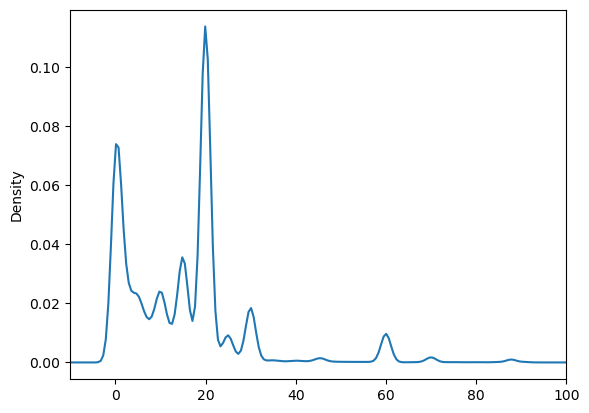

In [1097]:
#график распределиня времени просмотров в выступлениях
views_merge_schedule['time_viview_of_conf'].plot.kde(xlim=(-10,100));

Большинство просмотров в выступлениях составляют 20 минут. Попробуем отсечь аномалии - посмотрим на распределение 99% просмотров.

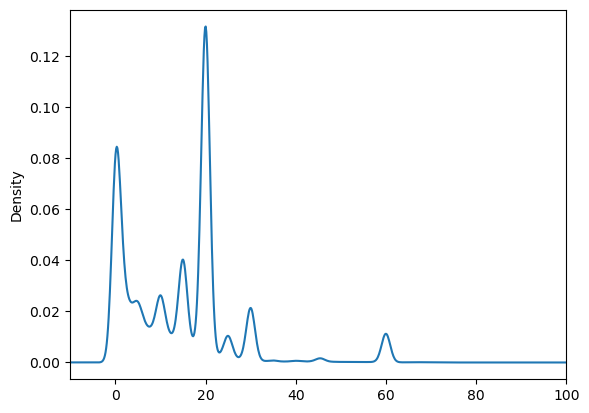

In [1098]:
views_merge_schedule[views_merge_schedule['time_viview_of_conf'] \
                     < np.quantile(views_merge_schedule[~views_merge_schedule['time_viview_of_conf'].isna()]\
                                       ['time_viview_of_conf'], 0.99)]['time_viview_of_conf'].plot.kde(xlim=(-10,100));

Пик на 20 минутах остался и небольшой пик на 15 минутах, т.е. в основном пользователи смотрят трансляции 15 или 20 минут.

Для дальнейшего анализа необходимо принять признак просмотра выступления, т.е. длительность просморта, по которой можно точно сказать, что конференция была увидена пользователем (условно увидена). Исходя из графика распределений просмотров можно было бы принять этот признак за 20 минут, но релевантнее целям анализа будет принять за признак ограничение по времени просмотра большее или равное половине длительности доклада.

In [1099]:
#фильтруем датафрейм по принятому признаку
views_merge_schedule = views_merge_schedule.query('time_viview_of_conf >= duration/2')

In [1100]:
print('Т.о., принятому признаку просмотра выступления соответствует ', \
      len(views_merge_schedule), ' строк (или просмотров). Количество уникальных лекторов в них - ', \
      views_merge_schedule['name'].nunique(), '.')

Т.о., принятому признаку просмотра выступления соответствует  233483  строк (или просмотров). Количество уникальных лекторов в них -  947 .


###  Топ-10 спикеров Мероприятий 11, 12

In [1122]:
#Топ-10 спикеров 
top_10_speaker_big = views_merge_schedule[((views_merge_schedule['event'].str.contains('11')) |\
                                           (views_merge_schedule['event'].str.contains('12')))]\
            .pivot_table(index='name', columns=[], values='uid', aggfunc=['nunique']).droplevel(1,axis=1)\
            .reset_index().sort_values(by='nunique',ascending=False).head(10)
top_10_speaker_big

,name,nunique
738,Тезиков Радик Ярославович,957
606,Подборнов Юрий Вадимович,874
513,Милешкина Жанна Артемовна,870
190,Бутогина Ксения Робертовна,798
255,Гордон Константин Алексеевич,789
261,Горьковых Егор Филиппович,771
580,Пелымцев Геннадий Никитович,753
729,Сущинский Руслан Радикович,732
532,Мусеева Александра Викторовна,726
504,Матковский Максим Иванович,670


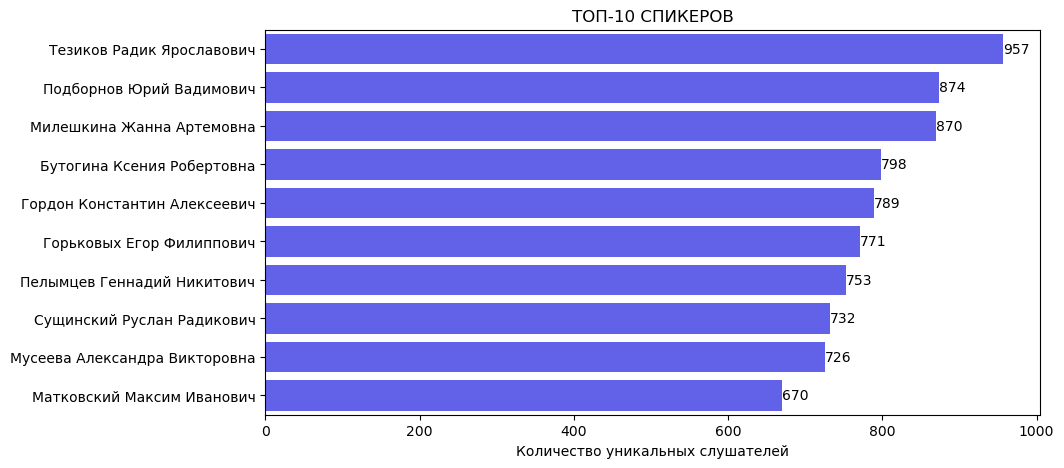

In [1123]:
#рисуем график
plt.figure(figsize=(10,5))
ax = sns.barplot(x='nunique', y='name', data=top_10_speaker_big, orient='h', alpha=0.7, color='blue')
ax.bar_label(ax.containers[0])
ax.set_title('ТОП-10 СПИКЕРОВ')
ax.set_xlabel('Количество уникальных слушателей')
ax.set_ylabel('')
plt.show()

### Антитоп спикеров Мероприятий 11,12

In [1104]:
#Антитоп-10 
offtop_10_speaker_big_withaut_round_table = views_merge_schedule[((views_merge_schedule['event'].str.contains('11')) |\
                                           (views_merge_schedule['event'].str.contains('12')))]\
            .pivot_table(index='name', columns=[], values='uid', aggfunc=['nunique']).droplevel(1,axis=1)\
            .reset_index().sort_values(by='nunique',ascending=False).tail(10)
offtop_10_speaker_big_withaut_round_table

,name,nunique
395,Козырь Кристина Ярославовна,2
635,Прохоренко Дамир Станиславович,2
101,Балтачиев Ян Дмитриевич,2
584,Перепелов Игорь Владимирович,2
874,Шипицын Константин Геннадьевич,2
416,Коронин Альберт Геннадьевич,2
833,Чекин Андрей Федорович,1
457,Леванидов Юрий Ярославович,1
452,Лакеева Элина Руслановна,1
236,Гацалов Артем Геннадьевич,1


###  Топ-10 спикеров небольших тематических мероприятий  

In [1105]:
#Топ-10 спикеров небольших тематических мероприятий
top_10_speaker_small = views_merge_schedule[~(views_merge_schedule['event'].str.contains('11')) &\
                                            ~(views_merge_schedule['event'].str.contains('12'))]\
            .pivot_table(index='name', columns=[], values='uid', aggfunc=['nunique']).droplevel(1,axis=1)\
            .reset_index().sort_values(by='nunique',ascending=False).head(10)
top_10_speaker_small

,name,nunique
14,Джин Геннадий Степанович,112
9,Боглаева Татьяна Глебовна,107
13,Влодзимирская Наталья Тимуровна,106
34,Самедов Валерий Дамирович,99
3,Бабочкина Елизавета Сергеевна,96
31,Растегаев Роман Валентинович,88
28,Монина Галина Андреевна,85
45,Ямаева Анна Даниловна,43
16,Закржевский Ильдар Дмитриевич,39
19,Клепова Маргарита Яковлевна,37


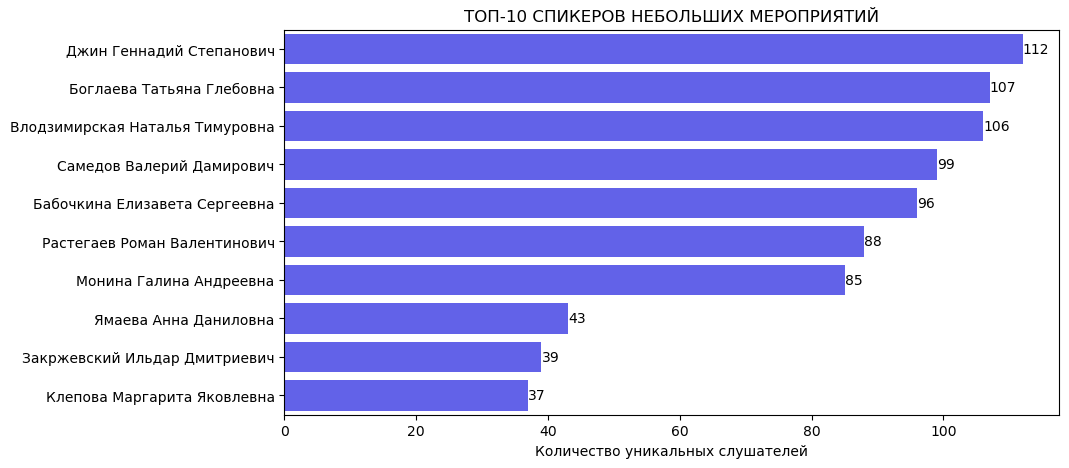

In [1106]:
#рисуем график
plt.figure(figsize=(10,5))
ax = sns.barplot(x='nunique', y='name', data=top_10_speaker_small, orient='h', alpha=0.7, color='blue')
ax.bar_label(ax.containers[0])
ax.set_title('ТОП-10 СПИКЕРОВ НЕБОЛЬШИХ МЕРОПРИЯТИЙ')
ax.set_xlabel('Количество уникальных слушателей')
ax.set_ylabel('')
plt.show()

### Антитоп спикеров небольших тематических мероприятий

In [1107]:
#Антитоп-10 спикеров небольших тематических мероприятий
offtop_10_speaker_small = views_merge_schedule[~(views_merge_schedule['event'].str.contains('11')) &\
                                            ~(views_merge_schedule['event'].str.contains('12'))]\
            .pivot_table(index='name', columns=[], values='uid', aggfunc=['nunique']).droplevel(1,axis=1)\
            .reset_index().sort_values(by='nunique',ascending=False).tail(10)
offtop_10_speaker_small

,name,nunique
18,Кашталинская Олеся Васильевна,12
6,Белоконская Гульнара Ильинична,11
44,Якубин Павел Валерьевич,9
43,Эльманова Галина Дмитриевна,8
26,Мазлумова Карина Михаиловна,8
2,Андрейчин Ильдар Владимирович,8
30,Полынов Дмитрий Ильич,8
7,Бикмулин Марат Радикович,7
12,Булавинцев Валентин Артемович,7
0,Авдеенков Ян Георгиевич,1


### Добавляем классификатор к датафрейму.

In [1108]:
views_shedule_merge_dict = views_merge_schedule.merge(dict_of_rubrics, on=['flow','date'])
views_shedule_merge_dict.shape

(1104755, 43)

Фильтруем полученный фрейм так, чтобы время начала выступления было во временном интервале сессии классификатора тем выступлений.

In [1109]:
views_shedule_merge_dict = \
views_shedule_merge_dict[((views_shedule_merge_dict['time_start_conference']>=views_shedule_merge_dict['time_start_ses']) &\
                      (views_shedule_merge_dict['time_start_conference']<=views_shedule_merge_dict['time_end_ses'])) |\
                      ((views_shedule_merge_dict['time_end_conference']>=views_shedule_merge_dict['time_start_ses']) &\
                      (views_shedule_merge_dict['time_end_conference']<=views_shedule_merge_dict['time_end_ses'])) |\
                      ((views_shedule_merge_dict['time_start_conference']<=views_shedule_merge_dict['time_start_ses']) &\
                      (views_shedule_merge_dict['time_end_conference'] >= views_shedule_merge_dict['time_end_ses']))]

In [1110]:
views_shedule_merge_dict.shape

(365533, 43)

###  Топ-10 тем Мероприятий 11,12.

In [1111]:
#Выбираем топ-10 тем Мероприятий 11,12
top_10_ses_big = views_shedule_merge_dict[(views_shedule_merge_dict['event'].str.contains('11')) |\
                                          (views_shedule_merge_dict['event'].str.contains('12'))]\
                    .pivot_table(index='session', columns=[], values='uid', aggfunc=['nunique']).droplevel(1,axis=1)\
                    .reset_index().sort_values(by='nunique',ascending=False).head(10)
top_10_ses_big

,session,nunique
17,Сессия 114,567
20,Сессия 119,539
16,Сессия 113,508
19,Сессия 118,482
24,Сессия 122,433
30,Сессия 128,386
23,Сессия 121,380
27,Сессия 125,371
15,Сессия 112,360
18,Сессия 117,351


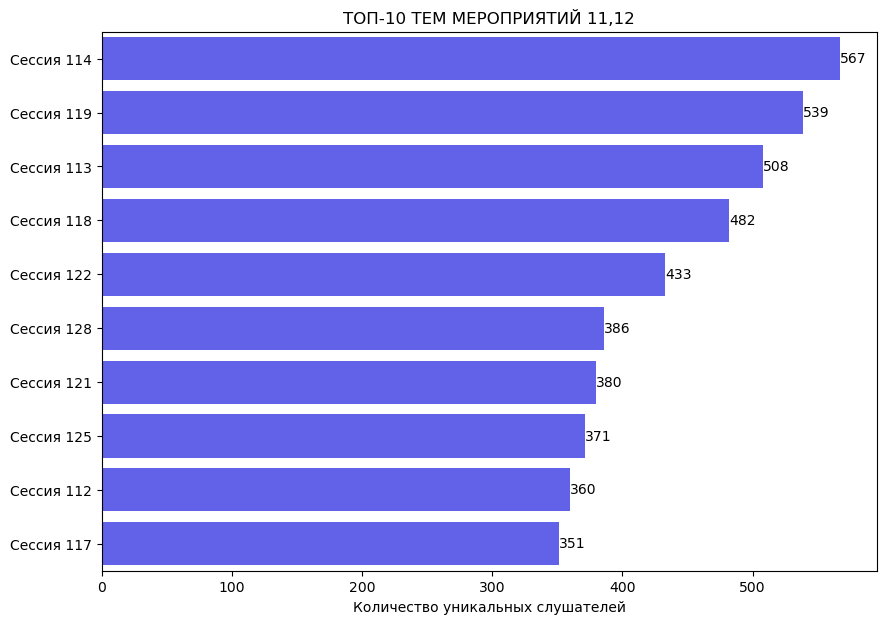

In [1112]:
#рисуем график
plt.figure(figsize=(10, 7))
ax = sns.barplot(x='nunique', y='session', data=top_10_ses_big, orient='h', alpha=0.7, color='blue')
ax.bar_label(ax.containers[0])
ax.set_title('ТОП-10 ТЕМ МЕРОПРИЯТИЙ 11,12')
ax.set_xlabel('Количество уникальных слушателей')
ax.set_ylabel('')
plt.show()

###  Антитоп-10 тем Мероприятий 11,12.

In [1113]:
#Антитоп-10 тем Мероприятий 11,12
offtop_10_ses_big = views_shedule_merge_dict[(views_shedule_merge_dict['event'].str.contains('11')) |\
                                          (views_shedule_merge_dict['event'].str.contains('12'))]\
                    .pivot_table(index='session', columns=[], values='uid', aggfunc=['nunique']).droplevel(1,axis=1)\
                    .reset_index().sort_values(by='nunique',ascending=False).tail(10)
offtop_10_ses_big

,session,nunique
9,Сессия 107,15
14,Сессия 111,13
96,Сессия 192,13
182,Сессия 62,12
118,Сессия 213,11
11,Сессия 109,10
181,Сессия 61,10
136,Сессия 230,8
219,Сессия 98,8
138,Сессия 232,4


### Рейтинг тем небольших мероприятий по просмотрам

In [1114]:
#Просмотры небольших мероприятий
views_small = views_merge_schedule[~(views_merge_schedule['event'].str.contains('11')) &\
                                          ~(views_merge_schedule['event'].str.contains('12'))]\
                    .pivot_table(index='event', columns=[], values='uid', aggfunc=['nunique']).droplevel(1,axis=1)\
                    .reset_index().sort_values(by='nunique',ascending=False)#.head(10)
views_small

,event,nunique
4,Мероприятие 5,139
0,Мероприятие 1,57
3,Мероприятие 4,52
1,Мероприятие 2,24
2,Мероприятие 3,16
5,Мероприятие 6,16


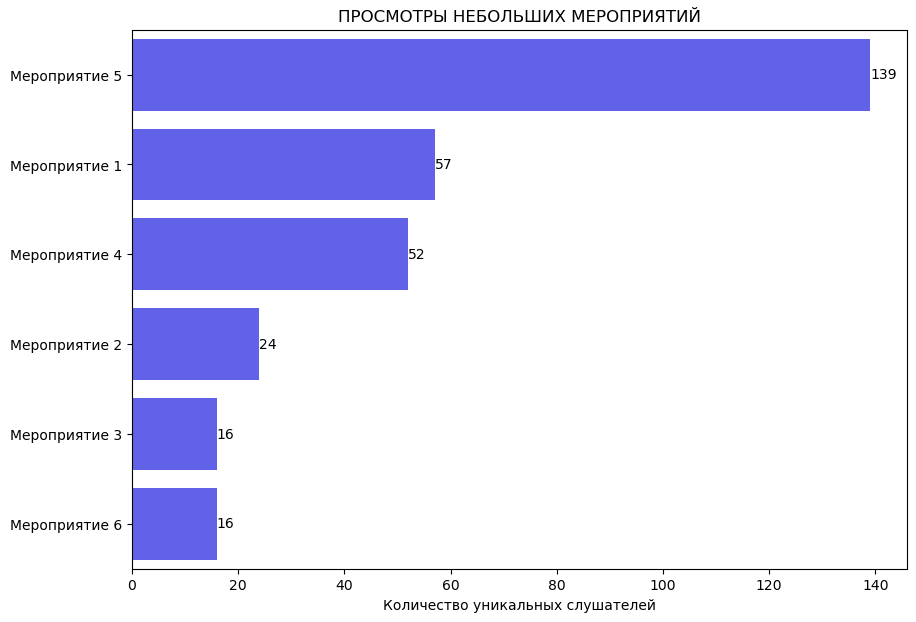

In [1115]:
#рисуем график
plt.figure(figsize=(10, 7))
ax = sns.barplot(x='nunique', y='event', data=views_small, orient='h', alpha=0.7, color='blue')
ax.bar_label(ax.containers[0])
ax.set_title('ПРОСМОТРЫ НЕБОЛЬШИХ МЕРОПРИЯТИЙ')
ax.set_xlabel('Количество уникальных слушателей')
ax.set_ylabel('')
plt.show()

## Сегментирование

Выделим наиболее активные профессии из топ-3 городов наиболее активных просмотров.

In [1116]:
#сегменты по городам (топ-3)
segm_of_city = views_merge_schedule.pivot_table(index='city_view', columns=[], values='uid', aggfunc=['nunique']).droplevel(1,axis=1)\
                    .reset_index().sort_values(by='nunique',ascending=False).head(3)
segm_of_city

,city_view,nunique
166,Санкт-Петербург,913
123,Москва,435
162,Ростов-на-Дону,75


In [1117]:
#сегменты Санкт-Петербурга по профессиям
segm_of_prof_Spb = views_merge_schedule[views_merge_schedule['city_view']=='Санкт-Петербург']\
        .pivot_table(index='profession', columns=[], values='uid', aggfunc=['nunique']).droplevel(1,axis=1)\
                    .reset_index().sort_values(by='nunique',ascending=False).head(10)
segm_of_prof_Spb

,profession,nunique
2,Врач,461
11,Ординатор - Аспирант,134
8,Медперсонал,102
5,Другое,51
7,Исследователь,44
12,Представитель медицинской компании,23
17,Студент медицинского ВУЗа,15
15,Руководящее звено клиники,15
25,обучающийся по медицинской специальности,13
10,Онколог,9


In [1118]:
#сегменты Москвы по профессиям
segm_of_prof_Msk = views_merge_schedule[views_merge_schedule['city_view']=='Москва'].pivot_table(index='profession', columns=[], values='uid', aggfunc=['nunique']).droplevel(1,axis=1)\
                    .reset_index().sort_values(by='nunique',ascending=False).head(10)
segm_of_prof_Msk

,profession,nunique
1,Врач,214
2,Другое,61
10,Представитель медицинской компании,53
9,Ординатор - Аспирант,41
5,Исследователь,26
11,Руководящее звено клиники,7
6,Медперсонал,4
12,Студент медицинского ВУЗа,4
14,обучающийся по медицинской специальности,2
18,фармацевт,2


In [1119]:
#сегменты Ростова-на-Дону по профессиям
segm_of_prof_Rstv = views_merge_schedule[views_merge_schedule['city_view']=='Ростов-на-Дону'].pivot_table(index='profession', columns=[], values='uid', aggfunc=['nunique']).droplevel(1,axis=1)\
                    .reset_index().sort_values(by='nunique',ascending=False).head(10)
segm_of_prof_Rstv

,profession,nunique
0,Врач,40
2,Исследователь,12
5,Ординатор - Аспирант,8
1,Другое,4
7,Руководящее звено клиники,4
4,Онколог,2
3,Немедицинский персонал клиники,1
6,Представитель медицинской компании,1
8,Студент медицинского ВУЗа,1
9,Фармацевт,1


* *Портреты" наиболее активных слушателей онлайн-трансляций онкоцентра:*
    + Врач из Санкт-Петербурга;
    + Врач из Москвы;
    + Ординатор - Аспирант из Санкт-Петербурга.

### Списки для рассылок

Выделим топ-10 выступлений по количеству уникальных просмотров и сформируем по каждому список уникальных идентификаторов пользователей для рассылок приглашений на мероприятие в будущие периоды.

In [1120]:
#сегменты по темам выступлений (топ-10)
segm_of_ses = views_shedule_merge_dict.pivot_table(index='session', columns=[], values='uid', aggfunc=['nunique'])\
                                      .droplevel(1,axis=1).reset_index().sort_values(by='nunique',ascending=False).head(10)
segm_of_ses

,session,nunique
17,Сессия 114,567
20,Сессия 119,539
16,Сессия 113,508
19,Сессия 118,482
24,Сессия 122,433
30,Сессия 128,386
23,Сессия 121,380
27,Сессия 125,371
15,Сессия 112,360
18,Сессия 117,351


In [1121]:
for session in segm_of_ses['session']:
    print(session,'\n', views_shedule_merge_dict[views_shedule_merge_dict['session']==session]['uid'].unique())

Сессия 114 
 [19085 20337 15034 20478 21456  1819  5960  2926  5409 12855  1557 21601
 14732  4094  8712   830  7233  4185 21793  5281  9586   651 20484 15511
  1184  7386 10132 14917  6770 21827  2704 20320 16504  3193  5690  1826
   896 20995   266 11304 14753  7031  5204 19868  3215  5440 20868 22308
   762  2186 21749  6514 11041  4433  1532  4144  3692  3823 18481  5861
 10169  9476  2659  3649  5865  3949  2280  4231 15105 13258  9512 10904
 21837 13524  5511 19769  9020 22356  4984 21760   436   649 22307   834
 15232   855 15259  3327  9985 10167 19351  3795 19121 11355 15419 10504
   676  3192  6905  4382 15291  7336 16672 10078  3920  5950 10262  5456
 15240 18061 19363  7042  3994  7392 11287  4325 10383   888 20626 17907
  6563  1837 15227   986 22251 11234 16808 17566 22105  3586  1759 13442
 15184   459   560 21089  6552 10964 13859  1563   891 10627 14058  9076
  9649  8895  9393   747  3081 13672 20326 13330 14613 20805  5772 19241
 15543  3896  1193  3494 19413 20491  

##   Выводы

* **Результаты анализа данных трансляций медицинского учреждения N**
-------------------------------------------------------
* ***Топ-10 спикеров Мероприятий 11,12***
    + Тезиков Радик Ярославович
    + Подборнов Юрий Вадимович	
	+ Милешкина Жанна Артемовна	
	+ Бутогина Ксения Робертовна	
	+ Гордон Константин Алексеевич	
	+ Горьковых Егор Филиппович	
	+ Пелымцев Геннадий Никитович	
	+ Сущинский Руслан Радикович	
	+ Мусеева Александра Викторовна	
	+ Матковский Максим Иванович	
    
------------------------------------------------------
* ***Топ-10 спикеров малых тематических мероприятий***    
    + Джин Геннадий Степанович	
	+ Боглаева Татьяна Глебовна	
	+ Влодзимирская Наталья Тимуровна	
	+ Самедов Валерий Дамирович	
	+ Бабочкина Елизавета Сергеевна	
	+ Растегаев Роман Валентинович	
	+ Монина Галина Андреевна	
	+ Ямаева Анна Даниловна	
	+ Закржевский Ильдар Дмитриевич	
	+ Клепова Маргарита Яковлевна	
------------------------------------------------------
    
* ***Топ-10 поппулярных тем Мероприятий 11,12***
    + Сессия 114	
	+ Сессия 119	
	+ Сессия 113	
	+ Сессия 118	
	+ Сессия 122	
	+ Сессия 128	
	+ Сессия 121	
	+ Сессия 125	
	+ Сессия 112	
	+ Сессия 117
------------------------------------------------------
    
* ***Рейтинг тем малых тематических мероприятий по количеству просмотров***
    + Мероприятие 5	
	+ Мероприятие 1	
	+ Мероприятие 4	
	+ Мероприятие 2	
	+ Мероприятие 3	
	+ Мероприятие 6	
    
------------------------------------------------------
    
* ***Портреты" наиболее активных пользователей по просмотрам***
    + Врач из Санкт-Петербурга;
    + Врач из Москвы;
    + Ординатор - Аспирант из Санкт-Петербурга.
    
------------------------------------------------------
***Рекомендации по наполняемости будущих мероприятий темами***
+ Считаю, что темы небольших тематических мероприятий на будущие трансляции можно оставить все, во-первых, потому что их всего 6, а, во-вторых, ярко-выраженных "аутсайдеров" среди них нет (минимальное количество уникальных просмотров - 16). По темам Мероприятий 11, 12 можно ввести минимальный фильтрующий параметр (количество уникальных просмотров, например, меньше 10) и тогда для будущих трансляций мы откажемся от тем Сессия 230, Сессия 98, Сессия 232.

***Рекомендации по наполняемости будущих мероприятий спикерами***
+ Как можно заметить из списка топ-10 спикеров Мероприятий 11,12 - нет скачкообразных падений количества уникальных просмотров у представителей списка, поэтому возможно нужно принять минимальное количество уникальных просмотров, как фильтрующий параметр для будущих приглашенных спикеров (судя по списку антитоп-10, спикеров с одним уникальным просмотром, например, четыре человека: Чекин Андрей Федорович, Леванидов Юрий Ярославович, Лакеева Элина Руслановна, Гацалов Артем Геннадьевич.
+ В списке Топ-10 спикеров небольших тематических мероприятий можно заметить резкое снижение количества уникальных просмотров после седьмого участника списка (с 85 до 43). Спикер с одним уникальным просмотром - Авдеенков Ян Георгиевич. 
